## We Have Our Xrays, now let's figure out what this structure is

<img src="https://drops.steingart.princeton.edu/MSE501_Fall_2017/Images/Lecture04/bragg_like_what.png">



In [63]:
## Simple Structure Factor Finder
%matplotlib inline
import sys
sys.path.append("/pithy/code")
from pithy import *

def sf(vec):
    runner = 0
    for v in vec:
        v = array(v)
        print v,real(exp(2*pi*1j*sum(v)))
        runner += real(exp(2*pi*1j*sum(v)))
    return runner




### FCC

FCC can be considered of the form A where

$$F_{\text{hkl}} = \sum_{n=1}^N f_n \exp(2\pi i (hu_n+kv_n+lw_n))$$

$$u_A=0,v_A=0,w_A=0$$

$$u_B=\frac{1}{2},v_B=\frac{1}{2},w_B=0$$

$$u_C=0,v_C=\frac{1}{2},w_C=\frac{1}{2}$$

$$u_D=\frac{1}{2},v_C=0,w_C=\frac{1}{2}$$



$$F= f [\exp(2\pi i(0))+ \exp(2\pi i (\frac{h}{2}+\frac{k}{2}+0)) + \exp(2\pi i (\frac{h}{2}+0+\frac{l}{2})) + \exp(2\pi i (0+\frac{k}{2}+\frac{l}{2}))]$$

$$F= f [1+ \exp(\pi i (h+k)+\exp(\pi i (k+l)+\exp(\pi i (h+l)]$$


so if 
- $h,k,l=\text{all even all odd}$ we should get a peak (4f)
- $h,k,l=\text{mixed}$ we should not get a peak (0)



In [66]:
## So let's try it out
a = [0,0,0]
b = [0,.5,.5]
c = [.5,.5,0]
d = [.5,0,.5]


s = [a,b,c,d] #s for set
sf(s)

[0 0 0] 1.0
[ 0.   0.5  0.5] 1.0
[ 0.5  0.5  0. ] 1.0
[ 0.5  0.   0.5] 1.0


4.0

### BCC

BCC can be considered of the form A,B where A = [0 0 0] and B = [1/2 1/2 1/2], so for any rotation we can say that

$$F_{\text{hkl}} = \sum_{n=1}^N f_n \exp(2\pi i (hu_n+kv_n+lw_n))$$

$$u_1=0,v_1=0,w_1=0$$

$$u_2=\frac{1}{2},v_2=\frac{1}{2},w_2=\frac{1}{2}$$

$$F= f [\exp(2\pi i(0))+ \exp(2\pi i (\frac{h}{2}+\frac{k}{2}+\frac{l}{2}))]$$

$$F= f [1+ \exp(\pi i (h+k+l)]$$


so if 
- $h+k+l=\text{even}$ we should get a peak
- $h+k+l=\text{odd}$ we should not get a peak




In [67]:
## So let's try it out
a = [0,0,0]
b = [.5,.5,.5]
s = [a,b] #s for set
sf(s)

[0 0 0] 1.0
[ 0.5  0.5  0.5] -1.0


0.0

### Simple Cubic


$$F_{\text{hkl}} = \sum_{n=1}^N f_n \exp(2\pi i (hu_n+kv_n+lw_n))$$

$$u_1=0,v_1=0,w_1=0$$

$$u_2=1,v_2=0,w_2=0$$

$$F= f [\exp(2\pi i(0))+ \exp(2\pi i h)]$$

$$F= f [1+ \exp(\pi i (2h)]$$

2 times _anything_ is even, so.....



In [43]:
## So let's try it out
a = [0,0,0]
b = [1,0,0]
s = [a,b] #s for set
sf(s)

2.0

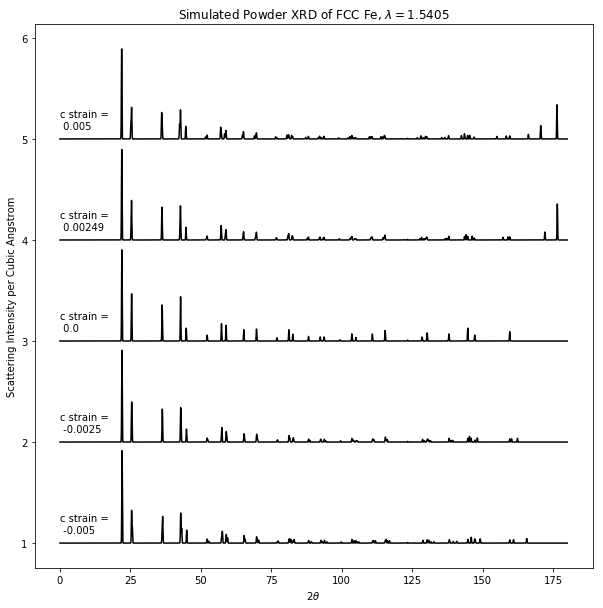

In [13]:
import sys

sys.path.append("/pithy/code")
sys.path.append("/notebooks/class_folder/Libraries/pylattice/")

#import above
from pithy import *
from lattice import *
import libruff
#jupyter magic call
%matplotlib inline

figure(figsize=(10,10))

#Let's see what happens when we strain a lattice
offset = 0
for strainer in linspace(-.005,.005,5):
    v1 = parameter*array([0,.5,.5+strainer]) 
    v2 = parameter*array([.5,0,.5+strainer])
    v3 = parameter*array([.5,.5,0])

    lattice = Lattice(v1,v2,v3)
    basis = Basis([('Fe',[0,0,0])], l_const=parameter)
    crystal = lattice + basis

    offset = offset+1
    scattering_data = powder_XRD(crystal, 1.5405)
    angles, values = spectrumify(scattering_data)
    plot(angles, values+offset,color="black")
    annotate("c strain =\n "+str(strainer)[0:7],xy=(0,offset+.1))

    
title(r'Simulated Powder XRD of FCC Fe, $\lambda = 1.5405$')
xlabel(r'$2\theta$')
ylabel(r'Scattering Intensity per Cubic Angstrom')
show()

